In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/organizations/uciml/sms-spam-collection-dataset/spam.csv


PRADEEP MANIKANDAN D 24BAD088 LAB EXPT 4

SCENARIO 3

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import string
import nltk
from nltk.corpus import stopwords

In [3]:
df = pd.read_csv("/kaggle/input/datasets/organizations/uciml/sms-spam-collection-dataset/spam.csv", encoding='latin-1')[['v1','v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df['clean_message'] = df['message'].apply(clean_text)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_message'])

In [13]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['label'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [17]:
model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)

MultinomialNB()

In [18]:
y_pred = model.predict(X_test)

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9633883704235463
Precision: 1.0
Recall: 0.7329842931937173
F1 Score: 0.8459214501510574

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1202
           1       1.00      0.73      0.85       191

    accuracy                           0.96      1393
   macro avg       0.98      0.87      0.91      1393
weighted avg       0.96      0.96      0.96      1393



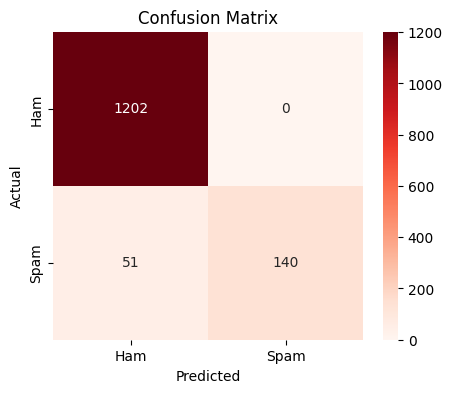

In [21]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Ham','Spam'],
            yticklabels=['Ham','Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

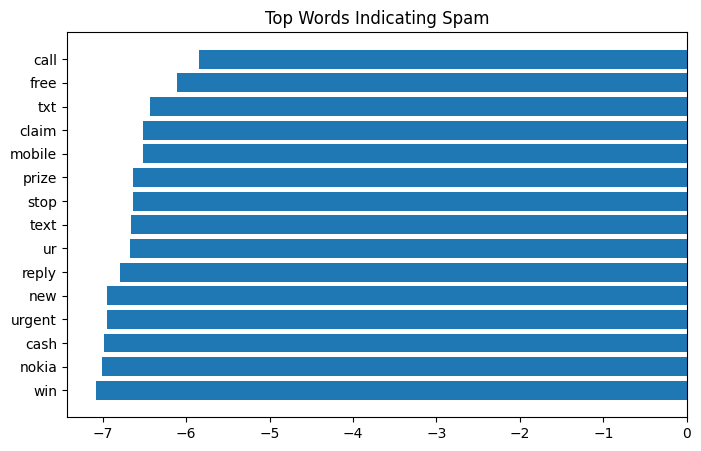

In [22]:
feature_names = vectorizer.get_feature_names_out()
spam_words = model.feature_log_prob_[1]

top_spam = np.argsort(spam_words)[-15:]

plt.figure(figsize=(8,5))
plt.barh(feature_names[top_spam], spam_words[top_spam])
plt.title("Top Words Indicating Spam")
plt.show()

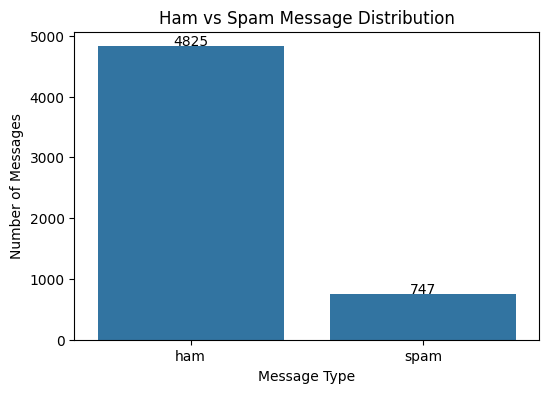

In [23]:
label_counts = df['label'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(
    x=label_counts.index,
    y=label_counts.values
)

plt.title("Ham vs Spam Message Distribution")
plt.xlabel("Message Type")
plt.ylabel("Number of Messages")

for i, v in enumerate(label_counts.values):
    plt.text(i, v + 20, v, ha='center')

plt.show()

SCENARIO NUM:2

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42)

In [27]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [32]:
y_pred = gnb.predict(X_test)

In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



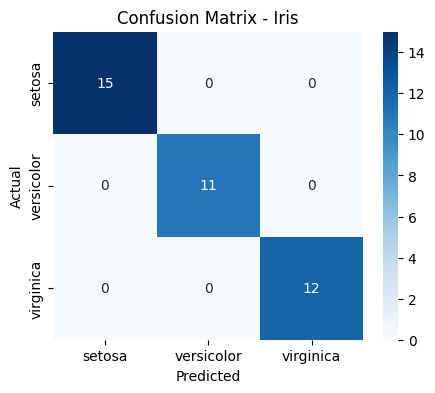

In [36]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Iris")
plt.show()

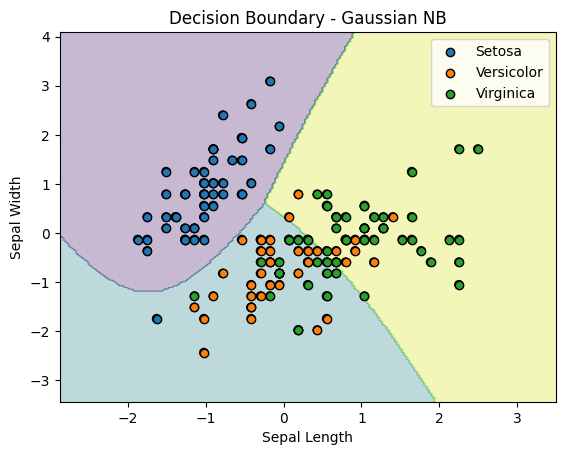

In [37]:
X2 = X_scaled[:, :2]

X_train, X_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.25, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

x_min, x_max = X2[:,0].min()-1, X2[:,0].max()+1
y_min, y_max = X2[:,1].min()-1, X2[:,1].max()+1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2[:,0], X2[:,1], c=y, edgecolor='k')
labels = ['Setosa', 'Versicolor', 'Virginica']
for i, label in enumerate(labels):
    plt.scatter(
        X2[y == i, 0],
        X2[y == i, 1],
        label=label,
        edgecolor='k'
    )
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Decision Boundary - Gaussian NB")
plt.legend()
plt.show()

In [38]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, lr_pred))

Logistic Regression Accuracy: 0.8421052631578947
